NMC_Group2_Project Solution using SAGEMATHS

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_bvp

In [3]:
# 1) Define the ODE system
def fun(Y, Yv, S, M, Gr, Pr, phi):
    U, dU, th, dth = Yv
    return np.vstack([
        dU,
        S*dU + M**2*U - Gr*th,
        dth,
        Pr*S*dth - phi*th
    ])

In [4]:
# 2) Boundary conditions at Y=0 and Y=1
def bc(Y0, Y1):
    U0, dU0, th0, dth0 = Y0
    U1, dU1, th1, dth1 = Y1
    return np.array([U0 - 1,
                     U1 - 1,
                     th0 - 1,
                     th1     ])

In [5]:
# 3) Fixed parameters
S_val, M_val, Pr_val, phi_val = 1.0, 1.0, 0.71, 2.0
Gr_values = [0, 5, 10, 20]

In [6]:
# 4) Initial mesh + simple guess
Y_mesh = np.linspace(0, 1, 200)
# guess U≈1 everywhere, θ≈1−Y so it goes from 1 to 0
Y_guess = np.zeros((4, Y_mesh.size))
Y_guess[0,:] = 1.0
Y_guess[2,:] = 1.0 - Y_mesh

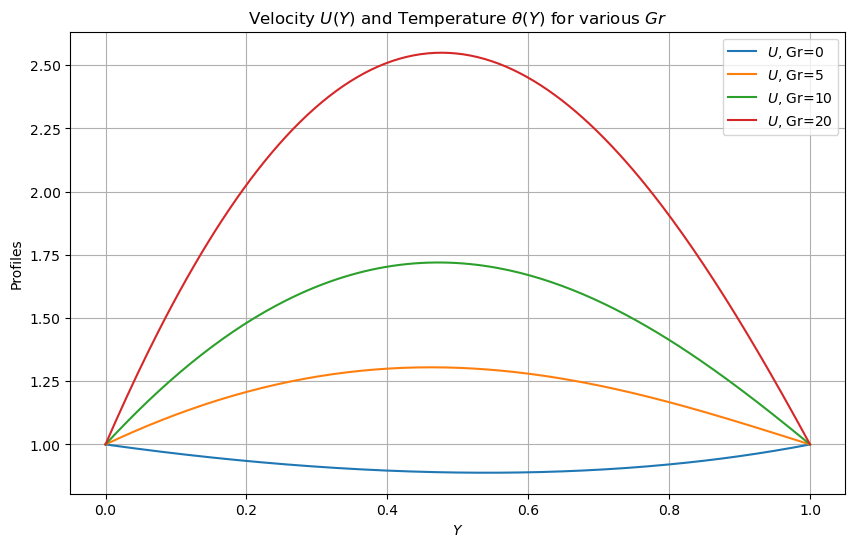

In [8]:
# 5) Solve & plot for each Grashof number
plt.figure(figsize=(10,6))
for Gr in Gr_values:
    sol = solve_bvp(
        lambda y, yy: fun(y, yy, S_val, M_val, Gr, Pr_val, phi_val),
        bc,
        Y_mesh,
        Y_guess,
        tol=1e-5
    )
    U_sol   = sol.y[0]
    th_sol  = sol.y[2]

    plt.plot(sol.x, U_sol,   label=f'$U$, Gr={Gr}')
    #plt.plot(sol.x, th_sol, '--', label=f'$\\theta$, Gr={Gr}')

plt.xlabel('$Y$')
plt.ylabel('Profiles')
plt.title('Velocity $U(Y)$ and Temperature $\\theta(Y)$ for various $Gr$')
plt.legend()
plt.grid(True)
plt.show()